<a href="https://colab.research.google.com/github/sudeepmathew/Voice-Of-Customer/blob/master/Unsupervised_Approach_to_Classify_Sentiments_and_Supervised_Approach_for_Classification_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
#import nessassary packages
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
from nltk import FreqDist
import spacy

In [0]:
data = pd.read_csv("/gdrive/My Drive/MGHectorComments.csv")

# Let's take a look in the data

In [4]:
data.head()

,selection1_name
0,Quote:\nOriginally Posted by blackwasp\nThanks...
1,What's happening with the names of cars these ...
2,Quote:\nOriginally Posted by blackwasp\nThanks...
3,Just quickly Googled about this Hector/Baojun ...
4,Quote:\nOriginally Posted by rovingeye\nJust q...


In [0]:
data.shape

(1623, 1)

# **Preprocessing Data**

In [5]:
nltk.download('wordnet') 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

# Libraries for text preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
stemming: invers
lemmatization: inversely
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Creating a Custom Stop Words List and Removing stop Words from Reviews

In [0]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "get","like","think","new","much",
             "https", "previously", "shown","quote","originally","posted","post","owner","youtube","www","http","would"]
stop_words = stop_words.union(new_words)

# Creating a Corpus of Cleaned Reviews

In [0]:
corpus = []
for i in range(0, 1623):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data['selection1_name'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [word for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [47]:
#View corpus item
print(corpus[200])

another mg hector breakdown time reported hyderabad youtu vkzt cacwdm


# Visualising in WordCloud

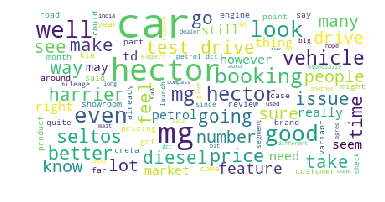

In [48]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [49]:
len(corpus)

1623

# Creating Bag of Words

In [0]:
bagofwords = []
for i in range (0,1623):
  words =corpus[i].split()
  bagofwords.append(words)

In [51]:
#printing bag of word of 100th item in the list
print(bagofwords[100])

['jailbird', 'fynix', 'mg', 'hector', 'club', 'india', 'fb', 'page', 'diesel', 'sharp', 'variant', 'lost', 'count', 'number', 'similar', 'posts', 'attachment', 'mods', 'please', 'remove', 'inappropriate', 'actually', 'found', 'person', 'car', 'saw', 'car', 'road', 'side', 'bonnet', 'open', 'added', 'smoke', 'burning', 'comment', 'people', 'found', 'registration', 'number', 'person', 'actual', 'confronted', 'acknowledged', 'saw', 'car', 'road', 'clicked', 'pics']


# Finding frequent Words from the Reviews

In [52]:
import itertools
import collections
all_words = list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print('Most commonly occuring words and frequency\n')
word_freq = collections.Counter(all_words)
word_freq.most_common(20)

['blackwasp', 'thanks', 'automobiles', 'encyclopedia', 'sending', 'images', 'seen', 'quite', 'times', 'city']

Most commonly occuring words and frequency



[('car', 1388),
 ('hector', 1360),
 ('mg', 1294),
 ('diesel', 568),
 ('petrol', 511),
 ('even', 491),
 ('cars', 459),
 ('well', 443),
 ('seltos', 433),
 ('kmpl', 419),
 ('good', 416),
 ('drive', 402),
 ('harrier', 398),
 ('people', 377),
 ('dct', 377),
 ('time', 343),
 ('vehicle', 317),
 ('mileage', 309),
 ('going', 302),
 ('price', 296)]

# Creating Data frame for Words and Frequency

In [53]:
freq_word_df = pd.DataFrame(word_freq.most_common(20), columns = ['Words','Freq'])
freq_word_df.head()

,Words,Freq
0,car,1388
1,hector,1360
2,mg,1294
3,diesel,568
4,petrol,511


# Visualising Frequency Chart

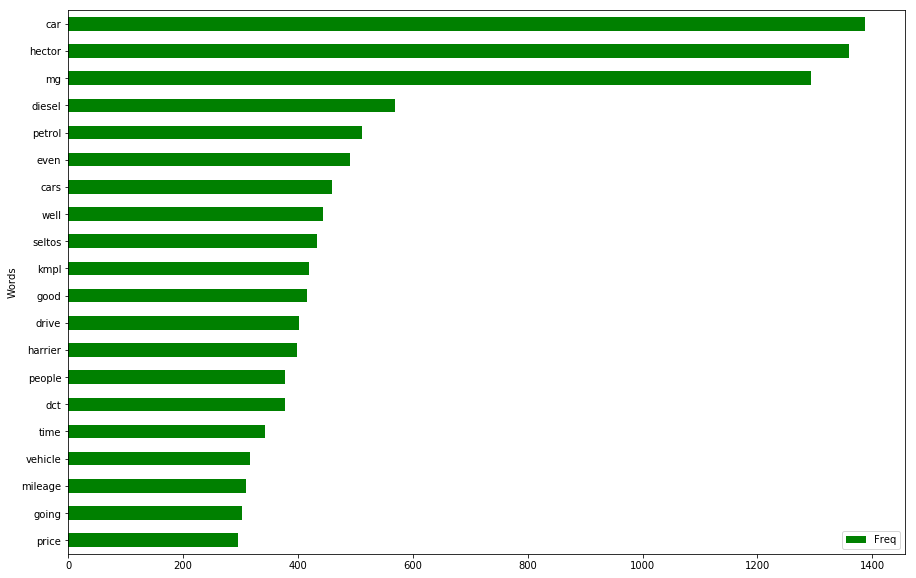

In [54]:
fig,ax = plt.subplots(figsize=(15,10))
freq_word_df.sort_values(by='Freq').plot.barh(x='Words',y='Freq',ax=ax,color = "green")
plt.show();

#Unsupervised Sentiment Analyis using Text Blob

In [55]:
from textblob import TextBlob
sentiment_text=[TextBlob(review) for review in corpus]
print(sentiment_text[0].polarity)
print(sentiment_text[0])

0.2
blackwasp thanks automobiles encyclopedia sending images seen quite times city never got chance click picture seems quite imposing though


# Getting Polarity Scores of Each Reviews

In [56]:
sentiments = [[review.sentiment.polarity,str(review)] for review in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns=['polarity','review'])
sentiment_df.sort_values(by='polarity',ascending=False)

,polarity,review
600,0.800000,gent announced price repeatedly mentioned stri...
689,0.800000,brochure lists proud history reinforces custom...
596,0.700000,superb pricing mg hector comes mg shield year ...
698,0.700000,monsoon forget diesel auto version harrier tat...
17,0.700000,thats good move people subscribe car months buy
1359,0.700000,good petrol engines expect hike k k maruti hyu...
537,0.700000,went mg test drive time rohini showroom delhi ...
187,0.700000,good petrol engines expect hike k k maruti hyu...
115,0.700000,keeping prospective buyer waiting months brand...
621,0.633333,looks mg hector everything favour good looks g...


# Plotting Sentiment Score Distribution

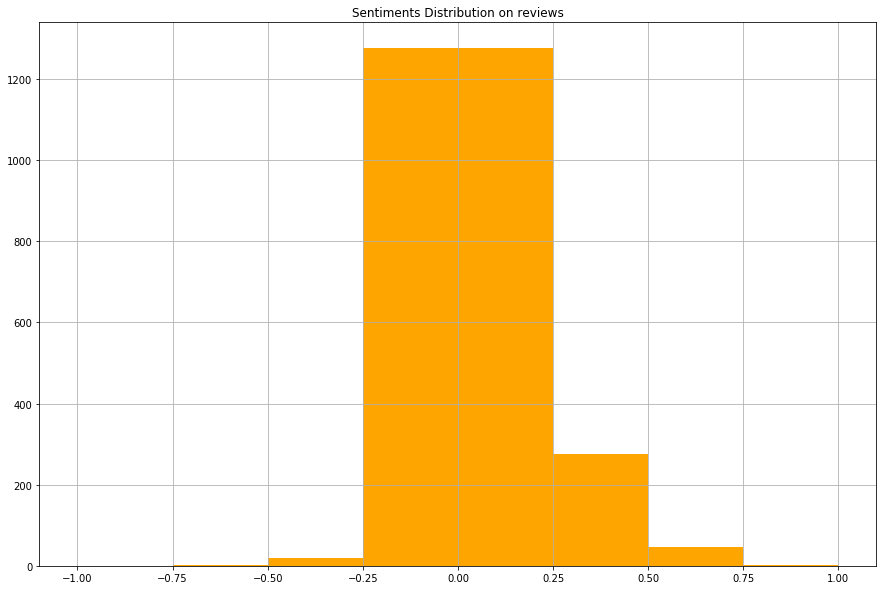

In [57]:
fig,ax = plt.subplots(figsize=(15,10))
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1], ax=ax, color='orange')
plt.title('Sentiments Distribution on reviews')
plt.show()

# Converting Sentiment Score into "Positive" if Score > 0.25 , "Negative" if Score < -0.25 and "Neutral" if Score between -0.25 to 0.25

In [0]:
sentiment_df['Sentiment'] = sentiment_df['polarity'].apply(lambda score: 'positive' if score > 0.0 else ('negative' if score < 0.0 else 'neutral'))

In [59]:
sentiment_df.head(10)

,polarity,review,Sentiment
0,0.200000,blackwasp thanks automobiles encyclopedia send...,positive
1,0.062500,happening names cars days first harrier hector...,positive
2,0.008750,blackwasp thanks automobiles encyclopedia send...,positive
3,0.341667,quickly googled hector baojun chevy captiva tr...,positive
4,0.294444,rovingeye quickly googled hector baojun chevy ...,positive
5,0.003333,capitva indeed rebadged baojun wuling similar ...,positive
6,0.027731,vipul singh capitva indeed rebadged baojun wul...,positive
7,0.600000,calling captiva india suicide given captiva hi...,positive
8,0.000000,mg woo indians guns blazing check videos youtu...,neutral
9,0.000000,rovingeye mg woo indians guns blazing btw idea...,neutral


In [60]:
sentiment_df.shape

(1623, 3)

# Supervised SVC model for Classifying Postive,Negative and Neutal

In [0]:
# importing train and test splitting for model creation
from sklearn.model_selection import train_test_split

# Spltting X as "Review" and y as "Sentiment"

In [0]:
X = sentiment_df['review']
y = sentiment_df['Sentiment']

In [63]:
X.shape
y.shape

(1623,)

# Train and Test Split with 70 % data on Training set and 30 % data on Test Set

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Importing Pipeline object to execute multiple classifyier

# Importing Tfidf Vectorizer

# Importing Linear SVC for classification

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [0]:
text_clf = Pipeline([('tfidf',TfidfVectorizer()),
                    ('clf',LinearSVC())])

# Fit Training data

In [68]:
text_clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

# Predicting Test data

In [0]:
predictions = text_clf.predict(X_test)

# Evaluvation

In [0]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Confusion Metrics

In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.89      0.57      0.69        74
     neutral       0.71      0.67      0.69        36
    positive       0.90      0.97      0.93       377

    accuracy                           0.88       487
   macro avg       0.83      0.73      0.77       487
weighted avg       0.88      0.88      0.88       487



# Accuracy Score

In [72]:
accuracy_score(y_test,predictions)

0.8829568788501027